In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from scipy.stats import pearsonr

sp500_path = Path("/Users/Tuna/Desktop/GitHub_Repo/Project-3/Project-3/Resources/sp500_historical_data")

sp500_engine = create_engine(f"sqlite:///{sp500_path}")
                       
sp500_connection = sp500_engine.connect()

In [4]:
#Read in sqlite database table as data frame
ch_sp500_df = pd.read_sql("SELECT * FROM sp500_historical_data", sp500_connection)
ch_sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,2798.219971,2860.310059,2722.270020,2834.399902,2834.399902,79159660000
1,2019-04-01,2848.629883,2949.520020,2848.629883,2945.830078,2945.830078,70090370000
2,2019-05-01,2952.330078,2954.129883,2750.520020,2752.060059,2752.060059,77250740000
3,2019-06-01,2751.530029,2964.149902,2728.810059,2941.760010,2941.760010,71250630000
4,2019-07-01,2971.409912,3027.979980,2952.219971,2980.379883,2980.379883,70599470000
...,...,...,...,...,...,...,...
56,2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000
57,2023-12-01,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000
58,2024-01-01,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000
59,2024-02-01,4861.109863,5111.060059,4853.520020,5096.270020,5096.270020,82066930000


In [5]:
ch_sp500_df['Date'] = pd.to_datetime(ch_sp500_df['Date'])
ch_sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,2798.219971,2860.310059,2722.270020,2834.399902,2834.399902,79159660000
1,2019-04-01,2848.629883,2949.520020,2848.629883,2945.830078,2945.830078,70090370000
2,2019-05-01,2952.330078,2954.129883,2750.520020,2752.060059,2752.060059,77250740000
3,2019-06-01,2751.530029,2964.149902,2728.810059,2941.760010,2941.760010,71250630000
4,2019-07-01,2971.409912,3027.979980,2952.219971,2980.379883,2980.379883,70599470000
...,...,...,...,...,...,...,...
56,2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000
57,2023-12-01,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000
58,2024-01-01,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000
59,2024-02-01,4861.109863,5111.060059,4853.520020,5096.270020,5096.270020,82066930000


In [7]:
federal_interest_rates_path = Path("/Users/Tuna/Desktop/GitHub_Repo/Project-3/Project-3/Resources/federal_interest_rates")
federal_interest_rates_engine = create_engine(f"sqlite:///{federal_interest_rates_path}")
federal_interest_rates_connection = federal_interest_rates_engine.connect()

In [8]:
ch_interest_rates_df = pd.read_sql("SELECT * FROM federal_interest_rates", federal_interest_rates_connection)
ch_interest_rates_df

,DATE,FEDFUNDS
0,3/1/19,2.41
1,4/1/19,2.42
2,5/1/19,2.39
3,6/1/19,2.38
4,7/1/19,2.4
...,...,...
56,11/1/23,5.33
57,12/1/23,5.33
58,1/1/24,5.33
59,2/1/24,5.33


In [9]:
ch_interest_rates_df.rename(columns={'DATE': 'Date', 'FEDFUNDS': 'Federal Interest Rate'}, inplace=True)
ch_interest_rates_df

,Date,Federal Interest Rate
0,3/1/19,2.41
1,4/1/19,2.42
2,5/1/19,2.39
3,6/1/19,2.38
4,7/1/19,2.4
...,...,...
56,11/1/23,5.33
57,12/1/23,5.33
58,1/1/24,5.33
59,2/1/24,5.33


In [10]:
ch_interest_rates_df['Date'] = pd.to_datetime(ch_interest_rates_df['Date'])
ch_interest_rates_df

/var/folders/kr/d9cdk9895qz518vz7x5y9wb40000gp/T/ipykernel_83744/1702969839.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ch_interest_rates_df['Date'] = pd.to_datetime(ch_interest_rates_df['Date'])


,Date,Federal Interest Rate
0,2019-03-01,2.41
1,2019-04-01,2.42
2,2019-05-01,2.39
3,2019-06-01,2.38
4,2019-07-01,2.4
...,...,...
56,2023-11-01,5.33
57,2023-12-01,5.33
58,2024-01-01,5.33
59,2024-02-01,5.33


In [11]:
ch_stock_price = ch_sp500_df['Close']
ch_interest_rate = ch_interest_rates_df['Federal Interest Rate']

ch_stock_price = ch_stock_price.astype(float)
ch_interest_rate = ch_interest_rate.astype(float)

correlation_coefficient, p_value = pearsonr(ch_stock_price, ch_interest_rate)

print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

Pearson correlation coefficient: 0.3230745953116509
P-Value: 0.011098084886275388


In [13]:
ch_stock_correlation_df = ch_sp500_df[['Close']].astype(float)
ch_interest_rate_correlation_df = ch_interest_rates_df[['Federal Interest Rate']].astype(float)

def lagged_correlation(x, y, max_lag):
    correlations = []
    for lag in range(1, max_lag + 1):
        shifted_y = y.shift(-lag)  # Shift the interest rates by lag periods
        common_indices = x.index.intersection(shifted_y.dropna().index)  # Find common indices after dropping missing values
        trimmed_x = x[common_indices]  # Trim x to common indices
        trimmed_y = shifted_y.dropna()[common_indices]  # Trim shifted_y to common indices after dropping missing values
        correlations.append(pearsonr(trimmed_x, trimmed_y)[0])  # Compute Pearson correlation coefficient
    return correlations

# Specify the maximum lag you want to consider
max_lag = 3

# Calculate lagged correlations
lagged_correlations = lagged_correlation(ch_stock_correlation_df['Close'], ch_interest_rate_correlation_df['Federal Interest Rate'], max_lag)

# Print the lagged correlations
for lag, correlation in enumerate(lagged_correlations, 1):
    print(f"Lag {lag}: {correlation}")


Lag 1: 0.31694771747623124
Lag 2: 0.3093804751089814
Lag 3: 0.31348978740416394


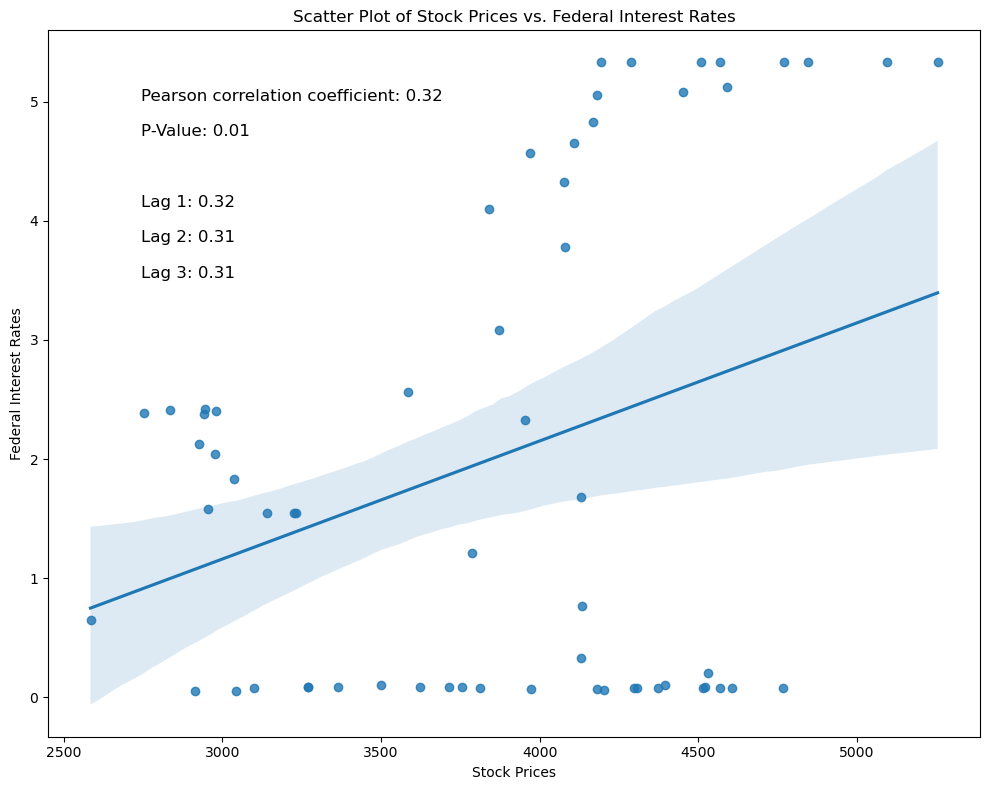

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with regression line
sns.regplot(x=ch_stock_price, y=ch_interest_rate, ax=ax)
ax.set_title('Scatter Plot of Stock Prices vs. Federal Interest Rates')
ax.set_xlabel('Stock Prices')
ax.set_ylabel('Federal Interest Rates')

# Add annotations for calculated values
ax.text(0.1, 0.9, f"Pearson correlation coefficient: {correlation_coefficient:.2f}", transform=ax.transAxes, fontsize=12)
ax.text(0.1, 0.85, f"P-Value: {p_value:.2f}", transform=ax.transAxes, fontsize=12)

# Add annotations for lagged correlations
for lag, correlation in enumerate(lagged_correlations, 1):
    ax.text(0.1, 0.8 - 0.05 * lag, f"Lag {lag}: {correlation:.2f}", transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig('sp500.png')
